In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Nombrar data frame y de una vez separarlo por "," y 
# se le aplica un index_col = 0 para que elimine el index por defecto, a  su vez se despliegan 
# todas las columnas para acceder facilmente a las variables antes de filtrar

df = pd.read_csv('rentviolation_top_100k.csv', sep=',', index_col = 0)

pd.set_option('display.max_columns', 100)



df.head()

,CaseNumber,PropertyID,PropertyAddress,TenantCode,Market,ViolationDate,ViolationType,ViolationStatus,ViolationDesc,ActionNeeded,ViolationCategory
RecordID,,,,,,,,,,,
520689-VI1,NaN,520689,2306 Miles Rd,t0012455,Cincinnati,2020-02-13 00:00:00.000,Warning,Closed,Junk vehicle at house,Remove vehicle,Other
520694-VI1,NaN,520694,8243 Daly Rd,t0005223,Cincinnati,2019-01-08 00:00:00.000,Warning,Closed,High Grass,Grass needs to be cut,Lawn/Weeds
1011-VI1,NaN,1011,5119 Pocono Dr,t016338a,Dayton,2018-10-12 00:00:00.000,Warning,Closed,Mattress at curb- trash,NaN,Trash
1016-VI1,NaN,1016,5886 Brandt Pike,t014205a,Dayton,2019-08-23 00:00:00.000,Warning,Closed,car without tags,NaN,Trailers/Vehicles
1016-VI2,NaN,1016,5886 Brandt Pike,t014205a,Dayton,2019-09-06 00:00:00.000,Warning,Closed,NaN,NaN,Other


In [3]:
# Para ver las caracteristicas de las variables por columna junto con los NaN, Null. adicionalmente para sacar los High Level description.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11674 entries, 520689-VI1 to 659748-VI2
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaseNumber         10392 non-null  float64
 1   PropertyID         11674 non-null  object 
 2   PropertyAddress    11674 non-null  object 
 3   TenantCode         9620 non-null   object 
 4   Market             11673 non-null  object 
 5   ViolationDate      11656 non-null  object 
 6   ViolationType      10816 non-null  object 
 7   ViolationStatus    11674 non-null  object 
 8   ViolationDesc      11394 non-null  object 
 9   ActionNeeded       7920 non-null   object 
 10  ViolationCategory  11637 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [4]:
# Función para contar cuantos casos tenemos por cada tipo de violación

df_colums = ["ViolationType", "Market"]

key_colums = "ViolationType"

def contar(df, parameter_colums):
    df_filter = df[parameter_colums]
    return (df_filter.groupby(key_colums).count())

contar(df, df_colums)

,Market
ViolationType,
!!!!URGENT!!!!! WATER AGREEMENT,1
"""violation""",1
", Case_21041977-Exceed Max Vehicles-5029 N 49th St-Ordinance 295-505-4-b-4-Fine $194.00",1
-PH20 01/31/2022 11:28,1
/5100 Refugee Rd_Vehicle - Case 22470-00529 dated 2-9-22 - DUPLICATE see 1273885,1
...,...
violations scanned 9/24 09/24/2021 17:37,1
violations scanned 9/24 09/24/2021 17:38,1
violations- 7/19/2021,1


In [5]:
# Uso esta función para sacar el Hig level description , en este caso me dice que la mayoria de las violaciones son
# Warrings que se dieron en Dayton

def stats_descrip(df, parameter_colums):
    df_filter = df[parameter_colums]
    return (df_filter.describe())

stats_descrip(df, df_colums)

,ViolationType,Market
count,10816,11673
unique,7895,25
top,Warning,Cincinnati
freq,952,3004


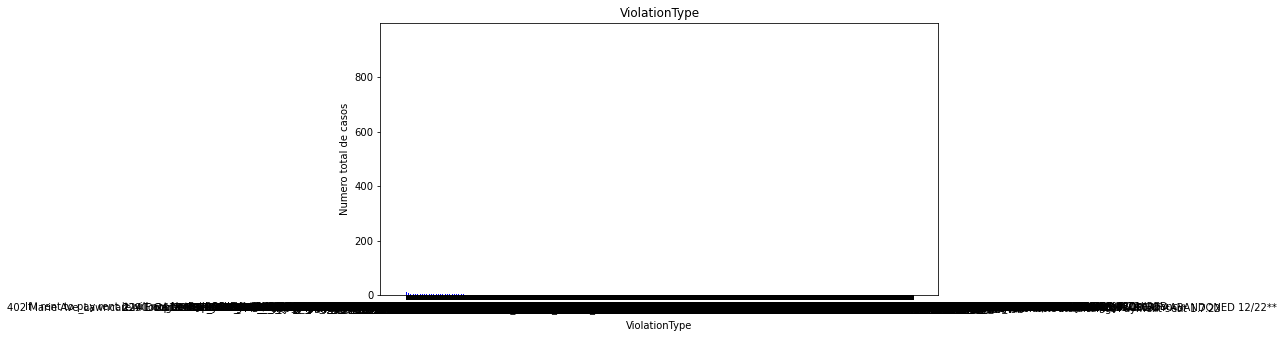

In [6]:
# Grafica de la distribución de propiedades por decada dando como resultado que la gran mayoria son advertencias
data = df["ViolationType"].value_counts()

courses = list(data.keys())

values = list(data.values)
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("ViolationType")
plt.ylabel("Numero total de casos")
plt.title("ViolationType")
plt.show()

In [7]:
# Función para contar cuantos casos tenemos por cada status de caso

df_colums = ["ViolationStatus", "Market"]

key_colums = "ViolationStatus"

def contar(df, parameter_colums):
    df_filter = df[parameter_colums]
    return (df_filter.groupby(key_colums).count())

contar(df, df_colums)

,Market
ViolationStatus,
Cancelled,13
Closed,10468
In Progress,127
New,23
On Hold,19
Open,3
Pending Court,24
Pending Property Management,398
Replied,18


In [8]:
# Uso esta función para sacar el Hig level description , en este caso me dice que la mayoria de las violaciones son
# casos cerrados que se dieron en Dayton

def stats_descrip(df, parameter_colums):
    df_filter = df[parameter_colums]
    return (df_filter.describe())

stats_descrip(df, df_colums)


,ViolationStatus,Market
count,11674,11673
unique,10,25
top,Closed,Cincinnati
freq,10468,3004


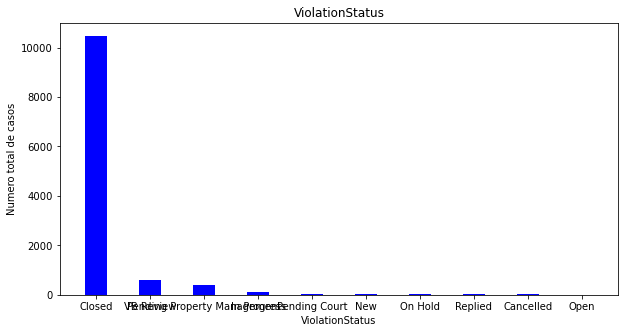

In [9]:
# Grafica de la distribución de propiedades por decada dando como resultado que el 99.2% de los casos estan cerrados
data = df["ViolationStatus"].value_counts()

courses = list(data.keys())

values = list(data.values)
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("ViolationStatus")
plt.ylabel("Numero total de casos")
plt.title("ViolationStatus")
plt.show()

In [10]:
# Uso esta función para sacar el Hig level description , en este caso me dice que la mayoria de las violaciones son
# casos relacionados con funcionalidades de la propiedad que se dieron en Dayton

def stats_descrip(df, parameter_colums):
    df_filter = df[parameter_colums]
    return (df_filter.describe())

stats_descrip(df, df_colums)


,ViolationStatus,Market
count,11674,11673
unique,10,25
top,Closed,Cincinnati
freq,10468,3004


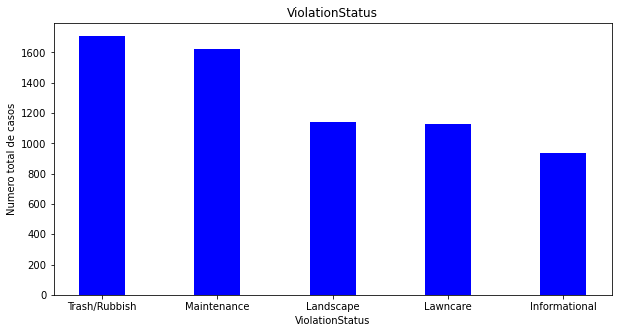

In [11]:
# Grafica de la distribución de propiedades por decada dando como resultado que el 99.2% de los casos estan cerrados
data = df["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("ViolationStatus")
plt.ylabel("Numero total de casos")
plt.title("ViolationStatus")
plt.show()

In [12]:
# Función para contar cuantos casos tenemos por cada categoria de caso encontrando que lo mas comun 
# son multas por electrodomesticos, mantenimiento de cesped y "otros"

df_colums = ["ViolationCategory", "Market"]

key_colums = "ViolationCategory"

def contar(df, parameter_colums):
    df_filter = df[parameter_colums]
    return (df_filter.groupby(key_colums).count())

contar(df, df_colums)

,Market
ViolationCategory,
Check Request;Fine Notice,3
Check Request;Informational;Fine Notice,2
Check Request;Informational;Trash/Rubbish;Fine Notice,1
Check Request;Trash/Rubbish;Fine Notice,3
Collections;Fine Notice,1
...,...
Vehicle;Lawncare;Trash/Rubbish,9
Vehicle;Lawncare;Trash/Rubbish;Gutters/Siding,14
Vehicle;Registration,1


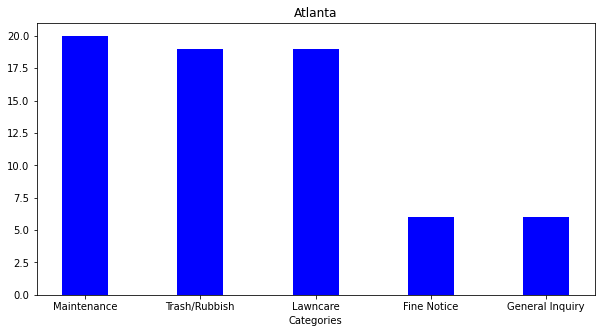

In [13]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Atlanta"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")

plt.title("Atlanta")
plt.show()

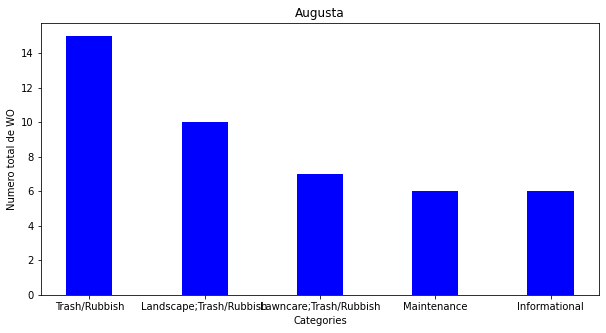

In [14]:

df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Augusta"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Augusta")
plt.show()

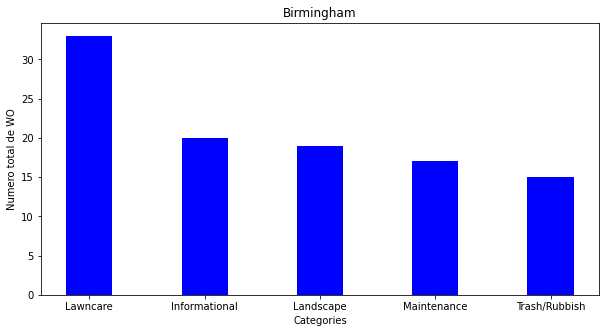

In [15]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Birmingham"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Birmingham")
plt.show()

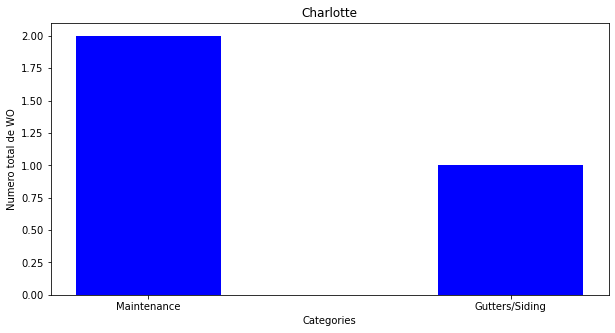

In [16]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Charlotte"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Charlotte")
plt.show()


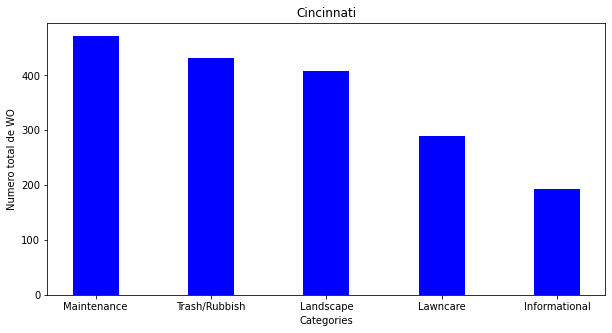

In [17]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Cincinnati"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Cincinnati")
plt.show()

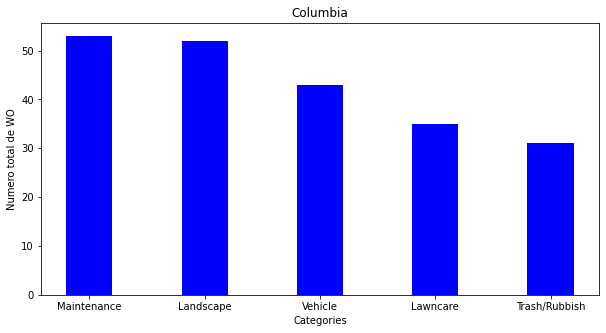

In [18]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Columbia"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Columbia")
plt.show()

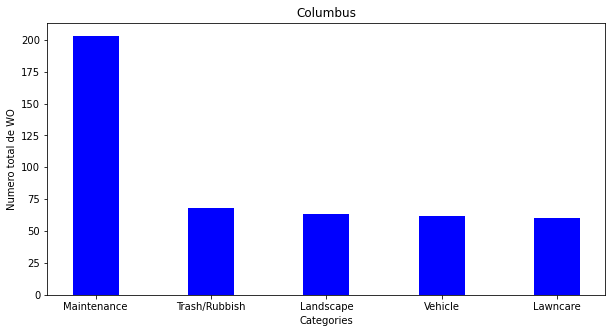

In [19]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Columbus"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Columbus")
plt.show()

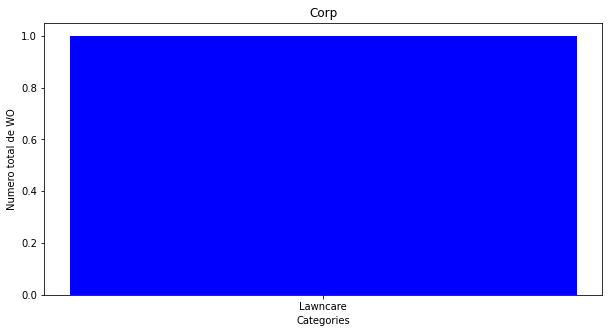

In [20]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Corp"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Corp")
plt.show()

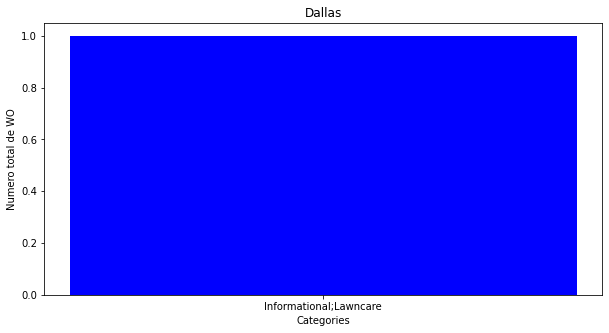

In [21]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Dallas"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Dallas")
plt.show()

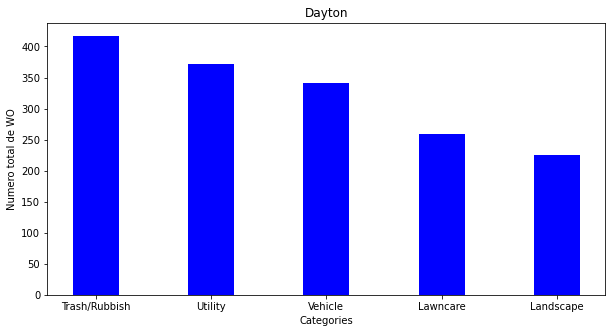

In [22]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Dayton"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Dayton")
plt.show()

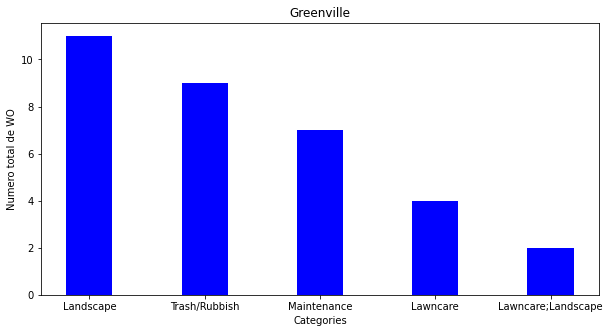

In [23]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Greenville"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Greenville")
plt.show()

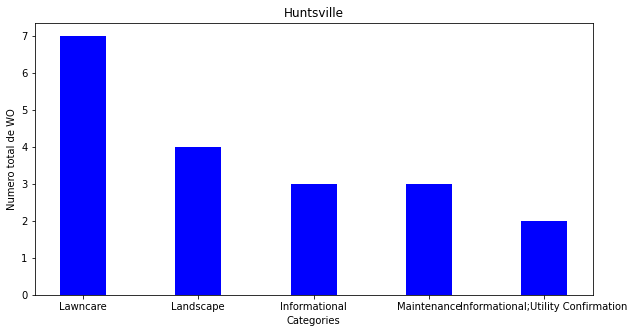

In [24]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Huntsville"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Huntsville")
plt.show()

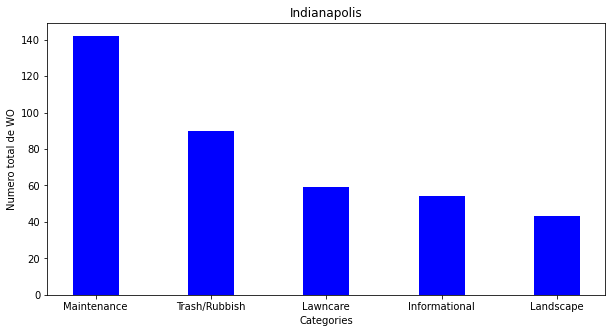

In [25]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Indianapolis"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Indianapolis")
plt.show()

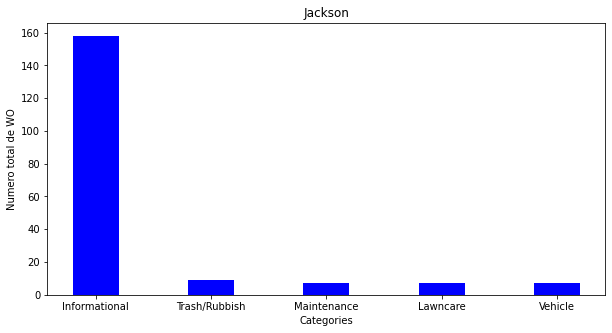

In [26]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Jackson"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Jackson")
plt.show()

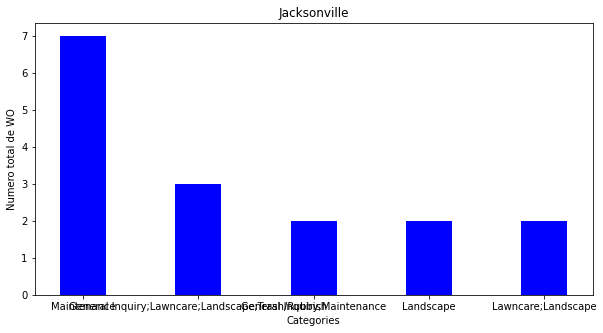

In [27]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Jacksonville"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Jacksonville")
plt.show()

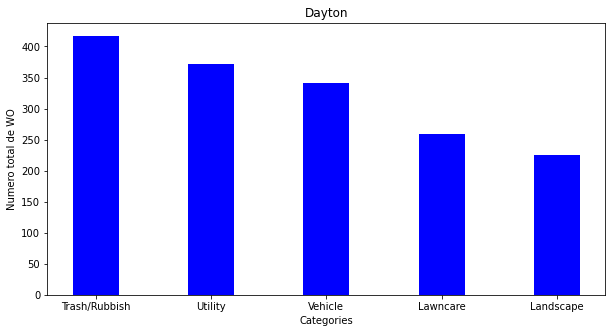

In [28]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Dayton"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Dayton")
plt.show()

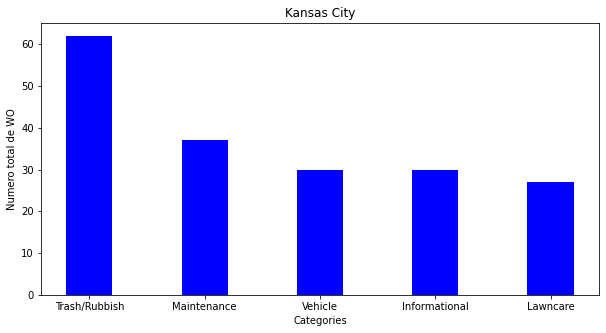

In [29]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Kansas City"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Kansas City")
plt.show()

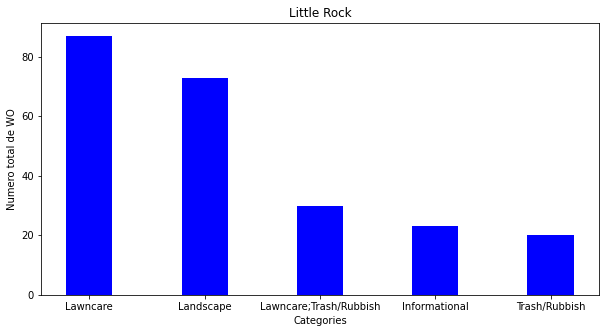

In [30]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Little Rock"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Little Rock")
plt.show()

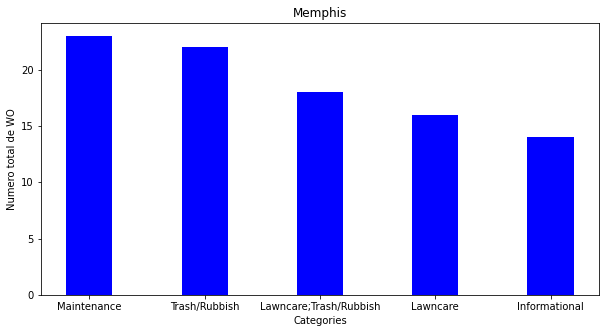

In [31]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Memphis"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Memphis")
plt.show()

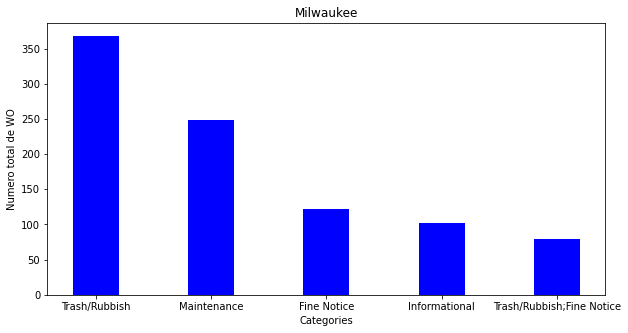

In [32]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Milwaukee"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Milwaukee")
plt.show()

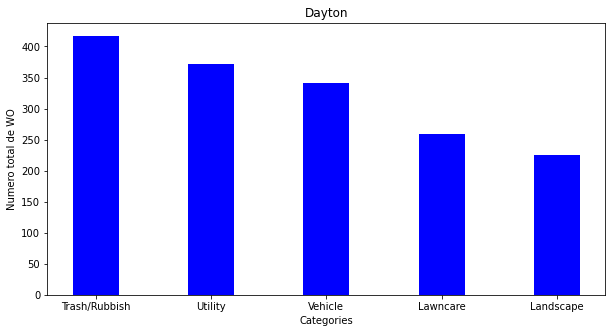

In [33]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Dayton"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Dayton")
plt.show()

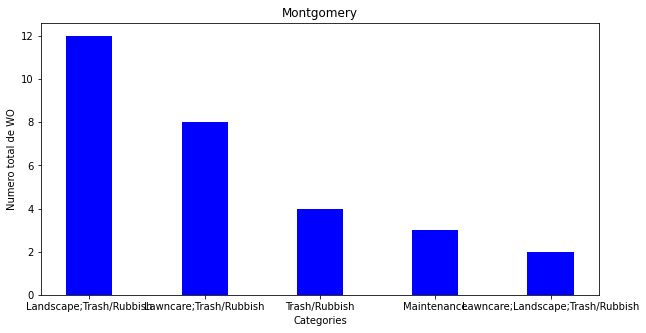

In [34]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Montgomery"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Montgomery")
plt.show()

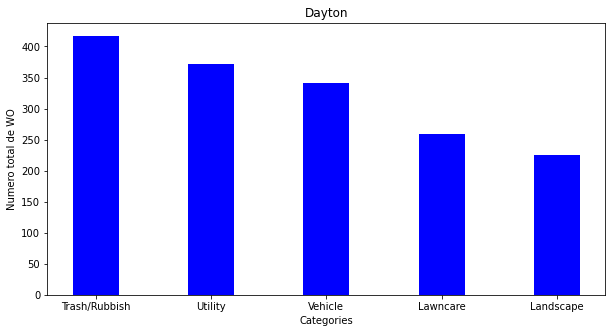

In [35]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Dayton"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Dayton")
plt.show()

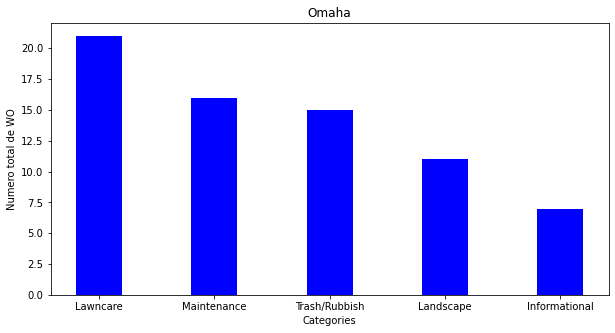

In [36]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Omaha"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Omaha")
plt.show()

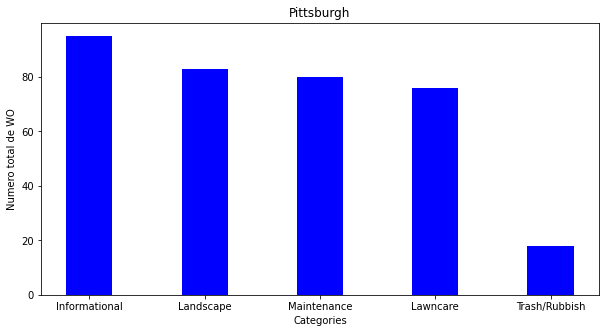

In [37]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Pittsburgh"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Pittsburgh")
plt.show()

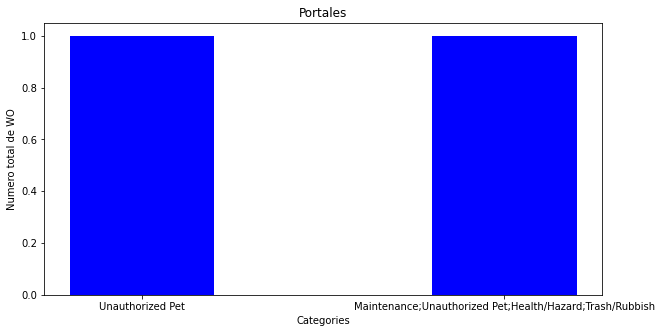

In [38]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "Portales"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("Portales")
plt.show()

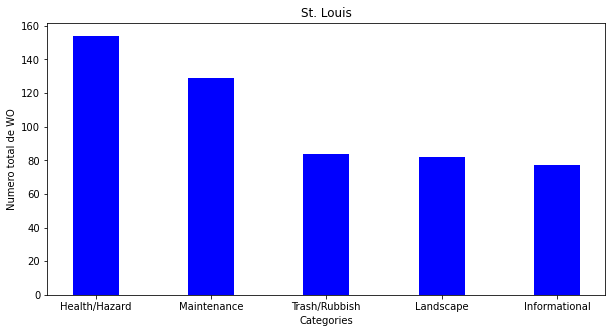

In [39]:
df_ciudad_viol = df[["Market", "ViolationCategory"]]

df_ciudad_viol_filtrado = pd.DataFrame(df_ciudad_viol.loc[df_ciudad_viol["Market"] == "St. Louis"])

data = df_ciudad_viol_filtrado["ViolationCategory"].value_counts()

courses = list(data.keys())[:5]

values = list(data.values)[:5]
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("Numero total de WO")
plt.title("St. Louis")
plt.show()